In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [2]:
df=pd.read_csv("data/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [5]:
coorelation_data=df.corr()
coorelation_data["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Year'>

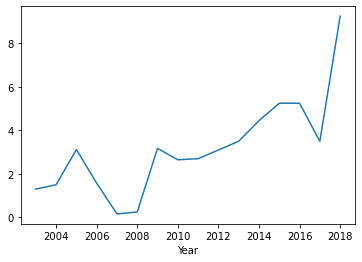

In [6]:
df.groupby("Year")["Selling_Price"].median().plot()

In [7]:
df.groupby("Car_Name")["Selling_Price"].count().shape

(98,)

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<BarContainer object of 301 artists>

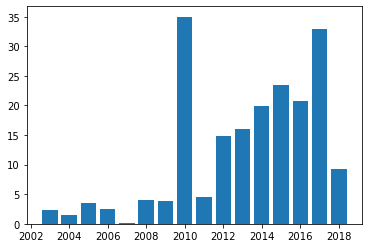

In [9]:
# plt.scatter(df.Selling_Price,df.Present_Price)
# df.groupby("Year")["Selling_Price"].median().plot()
plt.bar(df["Year"],df["Selling_Price"])

In [10]:
df["Current_Year"]=2022

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [12]:
df["num_year"]=df["Current_Year"]-df["Year"]

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,num_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


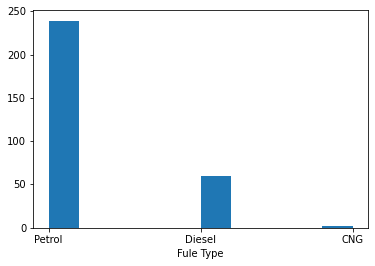

In [14]:
plt.hist(df.Fuel_Type)
plt.xlabel("Fule Type")
plt.show()

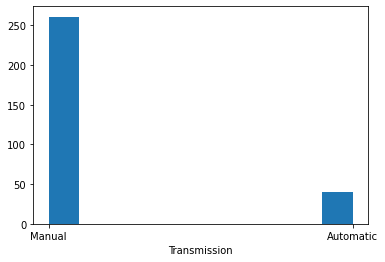

In [15]:
plt.hist(df.Transmission)
plt.xlabel("Transmission")
plt.show()

<AxesSubplot:xlabel='Fuel_Type'>

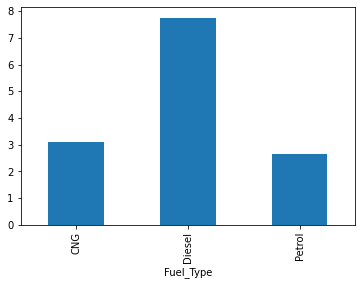

In [16]:
df.groupby("Fuel_Type")["Selling_Price"].median().plot.bar()

In [17]:
df.groupby(["Owner"]).count()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Current_Year,num_year
Owner,,,,,,,,,,
0,290,290,290,290,290,290,290,290,290,290
1,10,10,10,10,10,10,10,10,10,10
3,1,1,1,1,1,1,1,1,1,1


In [18]:
df.drop(df[df["Owner"]==3].index,inplace=True)

In [19]:
df.shape

(300, 11)

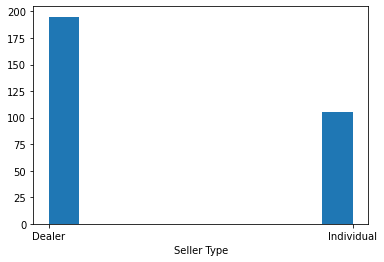

In [20]:
plt.hist(df["Seller_Type"])
plt.xlabel("Seller Type")
plt.show()

<AxesSubplot:xlabel='Seller_Type'>

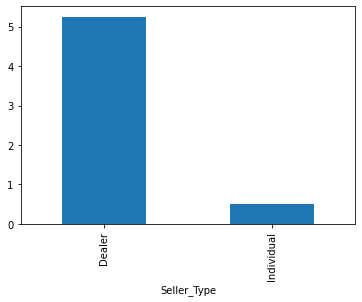

In [21]:
df.groupby("Seller_Type")["Selling_Price"].median().plot.bar()

In [22]:
df.drop(["Year","Current_Year"],axis=1,inplace=True)

In [23]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [24]:
df.drop("Car_Name",axis=1,inplace=True)

In [25]:
df=pd.get_dummies(data=df,drop_first=True)

In [26]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.887060,0.033450,-0.098617,-0.235213,0.552027,-0.540245,-0.550655,-0.374967
Present_Price,0.887060,1.000000,0.190247,-0.092024,0.031704,0.479397,-0.471357,-0.525125,-0.338477
Kms_Driven,0.033450,0.190247,1.000000,-0.025926,0.512732,0.179291,-0.179752,-0.115421,-0.142764
Owner,-0.098617,-0.092024,-0.025926,1.000000,0.107434,-0.046424,0.048918,0.097331,0.071782
num_year,-0.235213,0.031704,0.512732,0.107434,1.000000,-0.060655,0.056154,0.028368,0.022614
Fuel_Type_Diesel,0.552027,0.479397,0.179291,-0.046424,-0.060655,1.000000,-0.979631,-0.349428,-0.104073
Fuel_Type_Petrol,-0.540245,-0.471357,-0.179752,0.048918,0.056154,-0.979631,1.000000,0.357269,0.096445
Seller_Type_Individual,-0.550655,-0.525125,-0.115421,0.097331,0.028368,-0.349428,0.357269,1.000000,0.075849
Transmission_Manual,-0.374967,-0.338477,-0.142764,0.071782,0.022614,-0.104073,0.096445,0.075849,1.000000


In [27]:
x=df.corr()
x["Selling_Price"].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.887060
Fuel_Type_Diesel          0.552027
Kms_Driven                0.033450
Owner                    -0.098617
num_year                 -0.235213
Transmission_Manual      -0.374967
Fuel_Type_Petrol         -0.540245
Seller_Type_Individual   -0.550655
Name: Selling_Price, dtype: float64

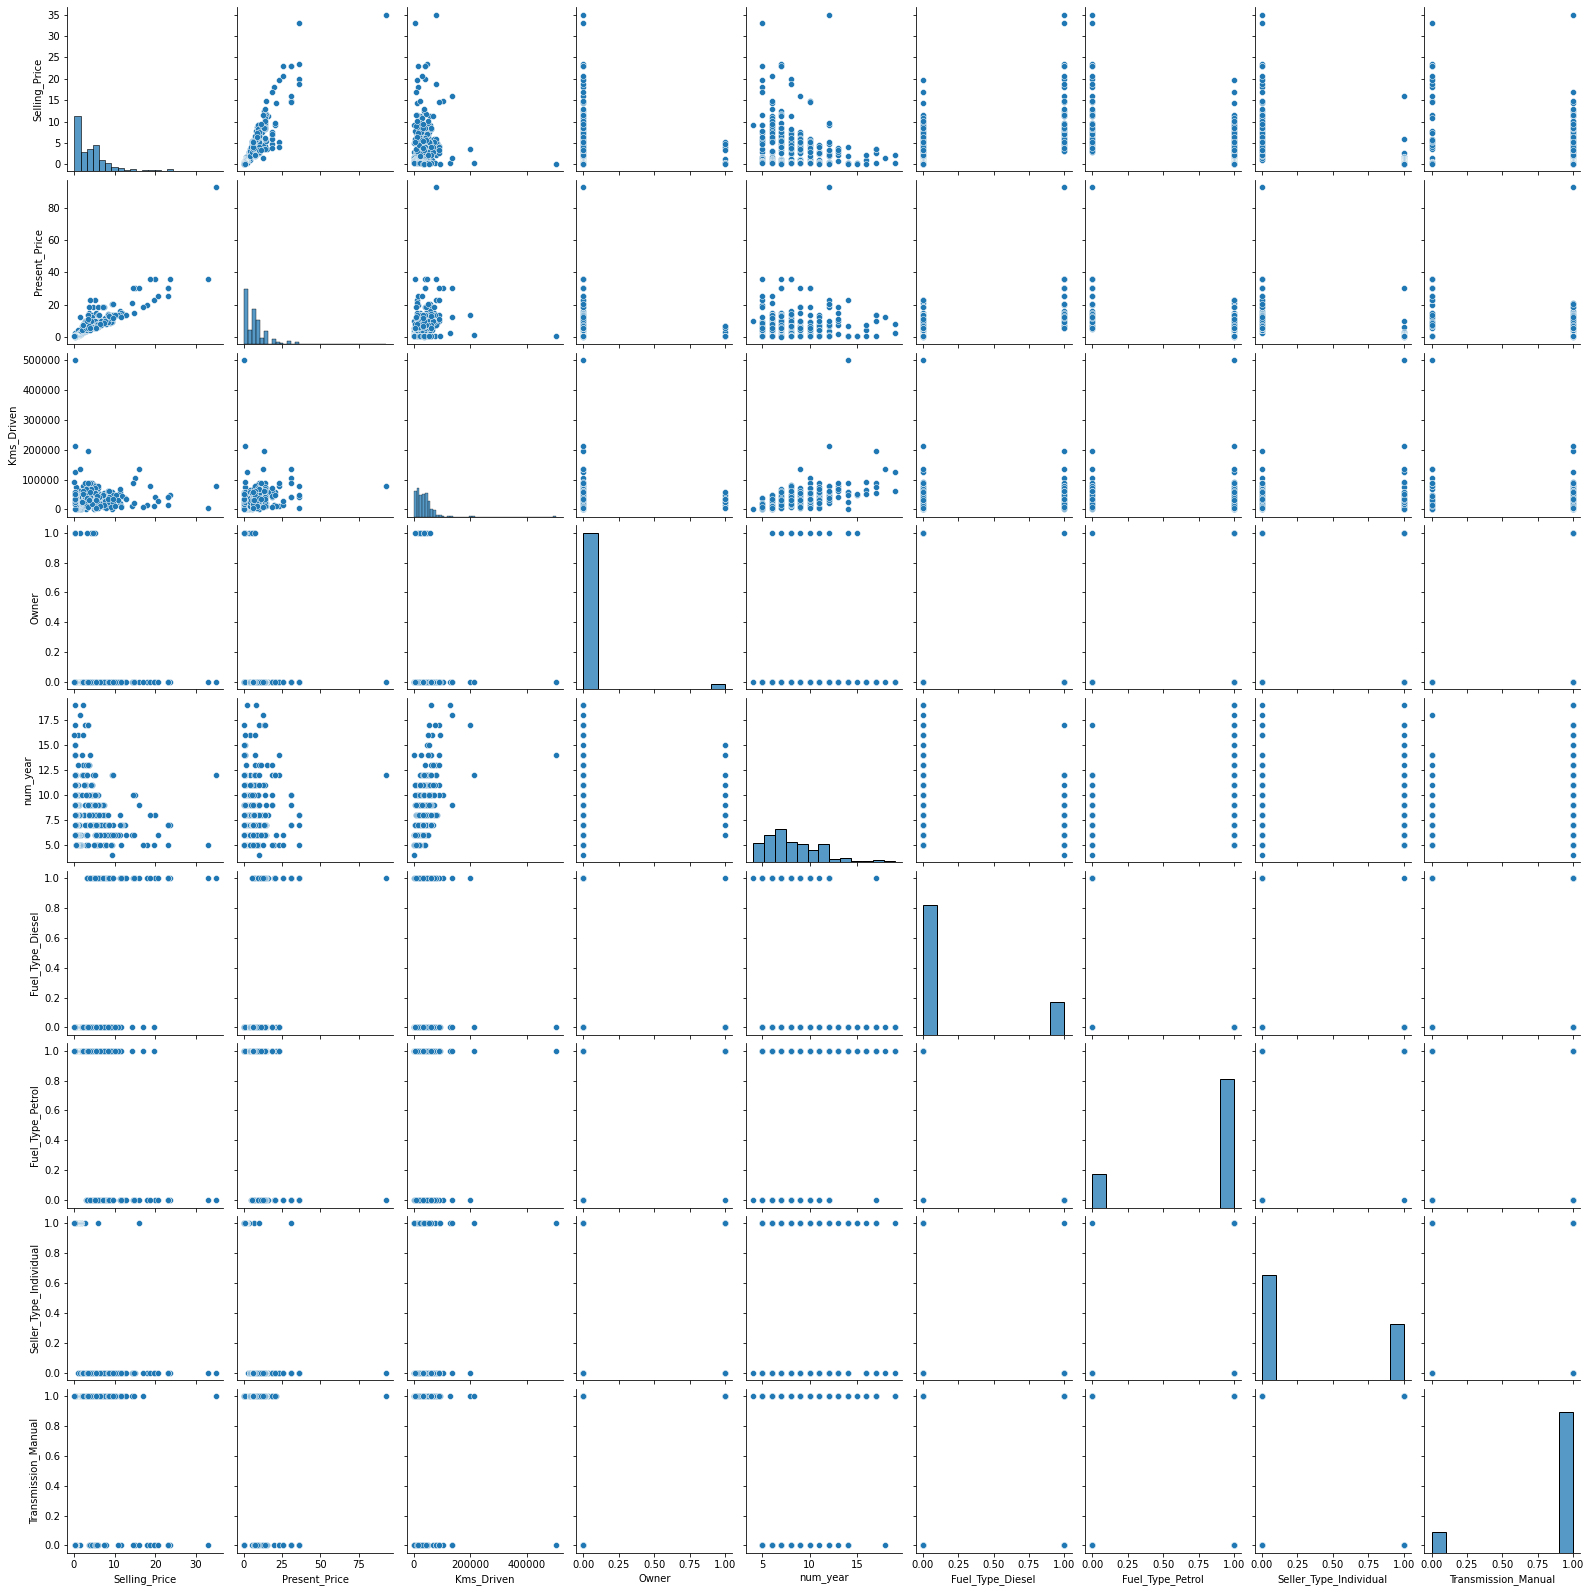

In [28]:
sns.pairplot(df,hue_order="Selling_Price")

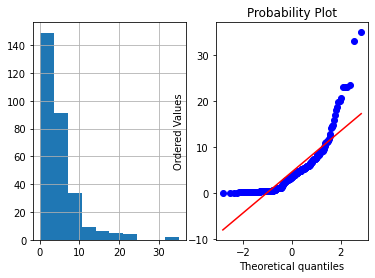

In [33]:
def plot_data(df,feature):
    
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

plot_data(df,"Selling_Price")

In [35]:
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

In [36]:
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [37]:
x

array([[0.0571088 , 0.05305305, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.09991331, 0.08508509, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.10327265, 0.01281281, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.11573472, 0.17504304, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.1319896 , 0.01701702, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06046814, 0.00993794, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
decision_tree.score(x_test,y_test)

0.9064233378240124

In [53]:
tree_cross=cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=10)
tree_cross.mean()

0.8900726244168473

In [43]:
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
random_forest.score(x_test,y_test)

0.9209143809752267

In [52]:
random_cross=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=10)
random_cross.mean()

0.9303636636475335

In [47]:
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [54]:
rid_cross=cross_val_score(Ridge(),x_train,y_train,cv=10)
rid_cross.mean()

0.7522998816733816